**Milestone 1- Project 2**                                                                    
Group 2


***Import Dependencies and "Pretty" Each CSV***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state

In [2]:
# List of CSV files to merge
data_path = "/Users/addisonlowman/DS4002P2/DATA/"

# List of CSV files to merge with their full paths
csv_files = [data_path + 'fixedGSSeverdivorced.csv',
             data_path + 'hapmar.csv',
             data_path + 'fixedGSShighestschoolspouse.csv',
             data_path + 'fixedGSSincome.csv',
             data_path + 'fixedGSSmaritalstatus.csv',
             data_path + 'children.csv',
             data_path + 'fixedGSSspouselaborstatus.csv']

# Read each CSV file into a DataFrame
dfs = [pd.read_csv(file) for file in csv_files]

# Merge DataFrames on 'ID' and 'Year'
merged_df = dfs[0]  # Start with the first DataFrame
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on=['id', 'year'], how='outer')

# Display the merged DataFrame
print(merged_df)

       code_divorced  label_divorced  year    id  code_hapmar  label_hapmar  \
0               -100            -100  1972     1         -100          -100   
1               -100               2  1972     2         -100          -100   
2               -100               2  1972     3         -100          -100   
3               -100               2  1972     4         -100          -100   
4               -100               2  1972     5         -100          -100   
...              ...             ...   ...   ...          ...           ...   
72385              1            -100  2022  3541            1          -100   
72386              1               1  2022  3542            1             1   
72387              2            -100  2022  3543            2          -100   
72388              3               2  2022  3544            3             1   
72389              2               2  2022  3545            2             2   

       code_highschools  label_highschools  code_in

In [4]:
columns_to_drop = ['code_divorced', 'code_hapmar', 'code_highschools', 'code_income', 'code_maritalstatus', 'code_child', 'code_sls']

# Drop the columns
df_dropped = merged_df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print(df_dropped)

       label_divorced  year    id  label_hapmar  label_highschools  \
0                -100  1972     1          -100               -100   
1                   2  1972     2          -100                 12   
2                   2  1972     3          -100                 11   
3                   2  1972     4          -100                 20   
4                   2  1972     5          -100                 12   
...               ...   ...   ...           ...                ...   
72385            -100  2022  3541          -100               -100   
72386               1  2022  3542             1                 16   
72387            -100  2022  3543          -100               -100   
72388               2  2022  3544             1                 19   
72389               2  2022  3545             2                 19   

       label_income  label_maritalstatus  label_child  label_sls  
0              -100                    5            0       -100  
1              -100      

In [5]:
variables_to_check = ['label_divorced', 'label_hapmar', 'label_highschools', 'label_income', 
                      'label_maritalstatus', 'label_child', 'label_sls']

# Define the value to drop
value_to_drop = [-100, -99, -98, -97, -96, -90]

# Create a mask to identify rows with the specified value to drop
mask = df_dropped[variables_to_check].isin(value_to_drop).any(axis=1)

# Drop rows based on the mask
df_filtered = df_dropped[~mask]

print(df_filtered)

       label_divorced  year    id  label_hapmar  label_highschools  \
1613                2  1973     1             1                  7   
1614                2  1973     2             1                  8   
1615                2  1973     3             1                 11   
1616                2  1973     4             1                 12   
1617                2  1973     5             2                  9   
...               ...   ...   ...           ...                ...   
72380               2  2022  3536             1                 12   
72381               1  2022  3537             1                 17   
72386               1  2022  3542             1                 16   
72388               2  2022  3544             1                 19   
72389               2  2022  3545             2                 19   

       label_income  label_maritalstatus  label_child  label_sls  
1613              9                    1            1          7  
1614              7      

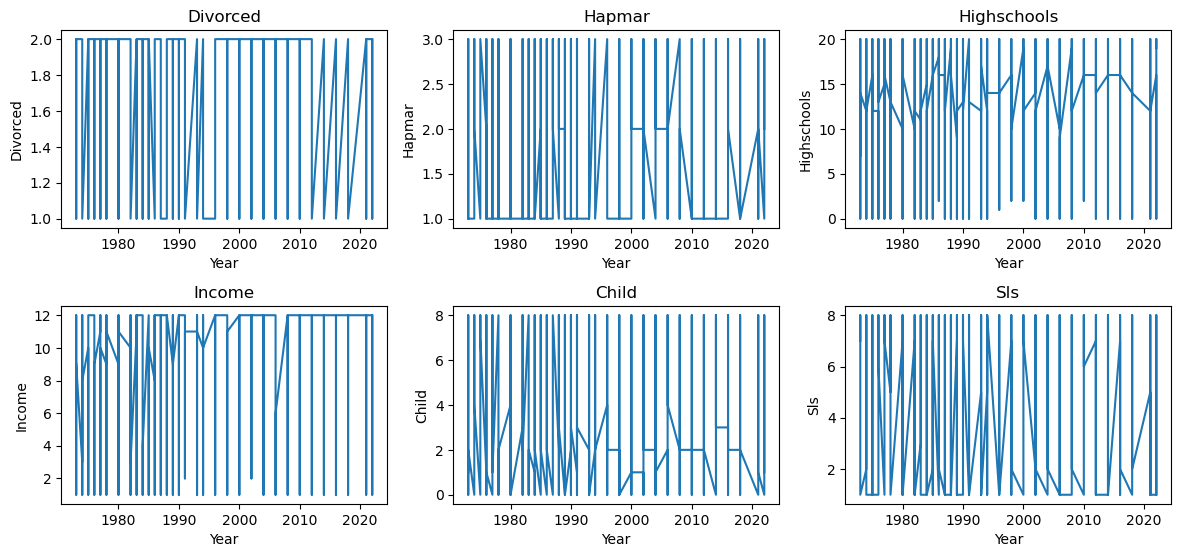

In [8]:
years = df_filtered['year']
variables = ['label_divorced', 'label_hapmar', 'label_highschools', 'label_income', 'label_child', 'label_sls']

# Create separate line graphs for each variable
plt.figure(figsize=(12, 8))

for i, var in enumerate(variables, start=1):
    plt.subplot(3, 3, i)
    plt.plot(years, df_filtered[var])
    plt.xlabel('Year')
    plt.ylabel(var.replace('label_', '').title())
    plt.title(var.replace('label_', '').title())

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [36]:
child_counts = df_filtered.groupby(['year', 'label_child']).size().reset_index(name='count')

print(child_counts)

     year  label_child  count
0    1973            0    142
1    1973            1    144
2    1973            2    287
3    1973            3    180
4    1973            4    119
..    ...          ...    ...
292  2022            4     95
293  2022            5     35
294  2022            6     17
295  2022            7      9
296  2022            8      8

[297 rows x 3 columns]


In [37]:
hap_counts = df_filtered.groupby(['year', 'label_hapmar']).size().reset_index(name='count')

print(hap_counts)

    year  label_hapmar  count
0   1973             1    674
1   1973             2    293
2   1973             3     25
3   1974             1    661
4   1974             2    268
..   ...           ...    ...
94  2021             2    609
95  2021             3     63
96  2022             1    783
97  2022             2    444
98  2022             3     64

[99 rows x 3 columns]


In [38]:
income_counts = df_filtered.groupby(['year', 'label_income']).size().reset_index(name='count')

print(income_counts)

     year  label_income  count
0    1973             1     11
1    1973             2     38
2    1973             3     50
3    1973             4     46
4    1973             5     45
..    ...           ...    ...
381  2022             8      2
382  2022             9     12
383  2022            10     13
384  2022            11     34
385  2022            12   1204

[386 rows x 3 columns]


In [39]:
div_counts = df_filtered.groupby(['year', 'label_divorced']).size().reset_index(name='count')

print(div_counts)

    year  label_divorced  count
0   1973               1    126
1   1973               2    866
2   1974               1    133
3   1974               2    828
4   1975               1    146
..   ...             ...    ...
61  2018               2    688
62  2021               1    442
63  2021               2   1286
64  2022               1    349
65  2022               2    942

[66 rows x 3 columns]


In [59]:
# Merge the dataframes on the 'year' column
merged_df = pd.merge(child_counts, hap_counts, on='year', how='outer', suffixes=('_child', '_hapmar'))
merged_df = pd.merge(merged_df, income_counts, on='year', how='outer')
merged_df = pd.merge(merged_df, div_counts, on='year', how='outer')

# Fill missing values with 0
merged_df = merged_df.fillna(0)

print(merged_df)

       year  label_child  count_child  label_hapmar  count_hapmar  \
0      1973            0          142             1           674   
1      1973            0          142             1           674   
2      1973            0          142             1           674   
3      1973            0          142             1           674   
4      1973            0          142             1           674   
...     ...          ...          ...           ...           ...   
20839  2022            8            8             3            64   
20840  2022            8            8             3            64   
20841  2022            8            8             3            64   
20842  2022            8            8             3            64   
20843  2022            8            8             3            64   

       label_income  count_x  label_divorced  count_y  
0                 1       11               1      126  
1                 1       11               2      866  
2  

In [62]:
X = merged_df[['count_hapmar', 'count_x', 'count_child']]
y = merged_df['count_y']  

# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print("Coefficients:")
for i, var in enumerate(X.columns):
    print(f"{var}: {model.coef_[i]}")

# Print the intercept
print("Intercept:", model.intercept_)

# Print R-squared value
print("R-squared:", model.score(X, y))

Coefficients:
count_hapmar: 0.14443862146009306
count_x: 0.051497658024473134
count_child: 0.27919475389750426
Intercept: 386.4785426909914
R-squared: 0.026331194164662564


/var/folders/v0/d0ppvnjs2jndbrp2bbdh8pkh0000gn/T/ipykernel_83669/4218938367.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['count_y'])


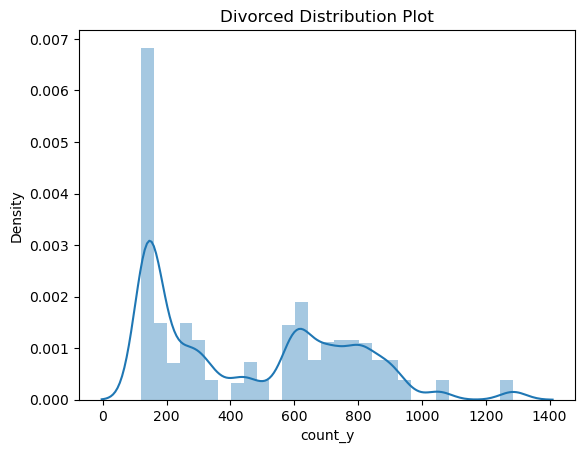

In [65]:
plt.title('Divorced Distribution Plot')
sns.distplot(merged_df['count_y'])
plt.show()

Happiness and Divorce Linear Regression

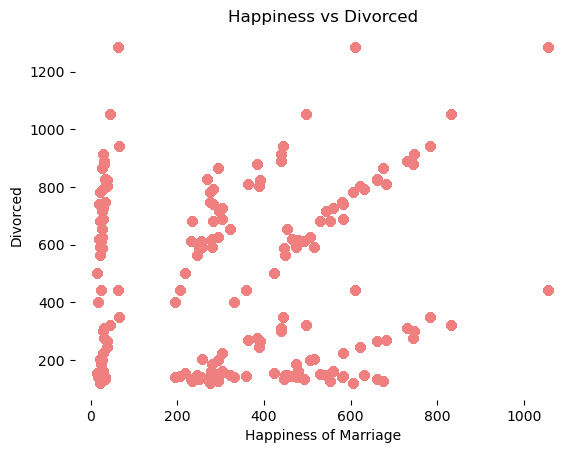

In [73]:
plt.scatter(merged_df['count_hapmar'], merged_df['count_y'], color = 'lightcoral')
plt.title('Happiness vs Divorced')
plt.xlabel('Happiness of Marriage')
plt.ylabel('Divorced')
plt.box(False)
plt.show()

In [68]:
X = merged_df[['count_hapmar']]
y = merged_df[['count_y']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [69]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)

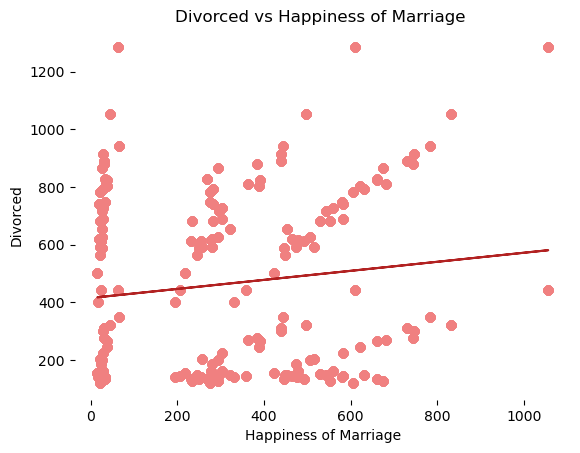

In [76]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Divorced vs Happiness of Marriage ')
plt.xlabel('Happiness of Marriage')
plt.ylabel('Divorced')
plt.box(False)
plt.show()

Income and Divorce Linear Regression

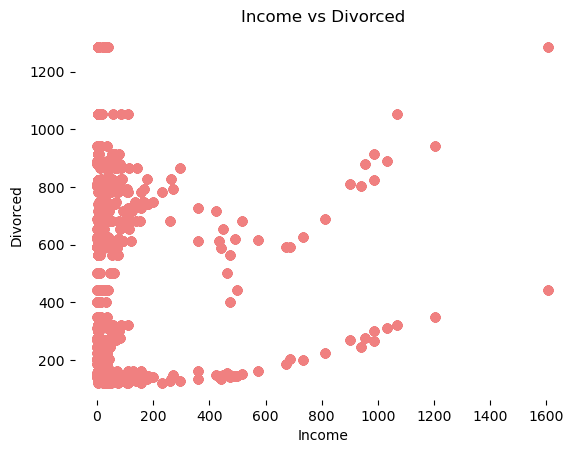

In [78]:
plt.scatter(merged_df['count_x'], merged_df['count_y'], color = 'lightcoral')
plt.title('Income vs Divorced')
plt.xlabel('Income')
plt.ylabel('Divorced')
plt.box(False)
plt.show()

In [79]:
X = merged_df[['count_x']]
y = merged_df[['count_y']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [80]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [81]:
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)

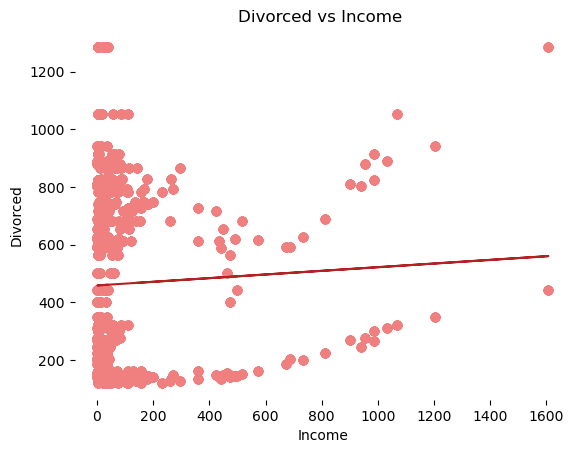

In [82]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Divorced vs Income ')
plt.xlabel('Income')
plt.ylabel('Divorced')
plt.box(False)
plt.show()

Children and Divorce Linear Regression

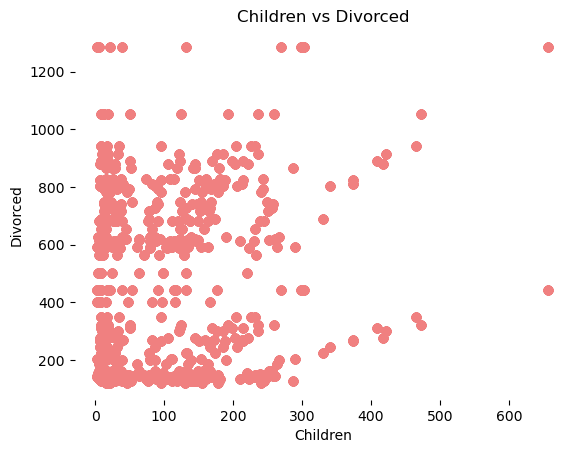

In [83]:
plt.scatter(merged_df['count_child'], merged_df['count_y'], color = 'lightcoral')
plt.title('Children vs Divorced')
plt.xlabel('Children')
plt.ylabel('Divorced')
plt.box(False)
plt.show()

In [84]:
X = merged_df[['count_child']]
y = merged_df[['count_y']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [85]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)

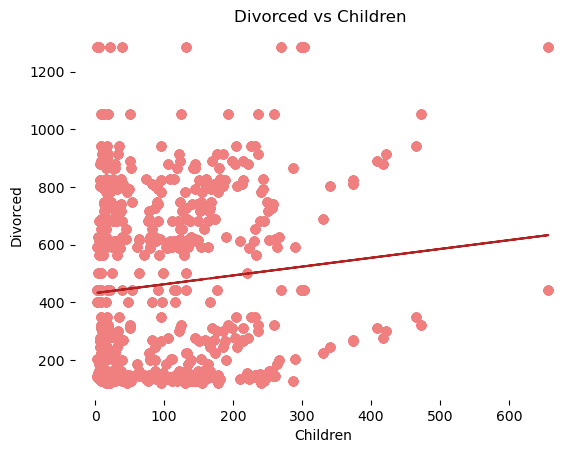

In [87]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Divorced vs Children ')
plt.xlabel('Children')
plt.ylabel('Divorced')
plt.box(False)
plt.show()